In [42]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

# 시간 관련
import time
import shap

In [1]:
# 1. 회원정보
features_member = [
    '남녀구분코드',
    '회원여부_이용가능_카드론', '입회경과개월수_신용', '회원여부_연체', '동의여부_한도증액안내',
    '탈회횟수_누적', '탈회횟수_발급1년이내',
    '거주시도명',
    '유효카드수_신용체크',
    '이용카드수_신용체크',
    '이용금액_R3M_신용체크',
    '보유여부_해외겸용_본인', '이용여부_3M_해외겸용_본인',
    '연회비발생카드수_B0M', '기본연회비_B0M', '제휴연회비_B0M'
]

In [2]:
# 2. 신용정보
features_credit = [
    '최초한도금액',
    '카드이용한도금액', 'CA한도금액',
    '일시상환론한도금액', '월상환론한도금액',
    'CA이자율_할인전',
    'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전',
    'RV약정청구율', 'RV최소결제비율',
    '한도증액횟수_R12M',
    '한도증액금액_R12M', '상향가능CA한도금액', '월상환론상향가능한도금액',
    '일시불ONLY전환가능여부', '특별한도보유여부_R3M', '연체감액여부_R3M'
]

In [3]:
# 3. 승인매출정보
features_tx = [
    '이용건수_신용_B0M',
    '이용금액_일시불_B0M', '이용후경과월_신용', '이용후경과월_일시불', '이용후경과월_체크',
    '이용금액_해외', '쇼핑_도소매_이용금액', '쇼핑_마트_이용금액', '쇼핑_온라인_이용금액',
    '교통_주유이용금액', '교통_정비이용금액', '여유_숙박이용금액',
    '할부건수_3M_R12M', '할부금액_3M_R12M',
    'RP건수_B0M', 'RP건수_통신_B0M', 'RP건수_보험_B0M', 'RP건수_교통_B0M', 'RP후경과월',
    '카드론이용건수_누적', '카드론이용금액_누적', '최종카드론_대출이율', '최종카드론_대출금액',
    '이용건수_온라인_R6M', '이용건수_페이_온라인_R6M',
    '이용건수_A페이_R6M', '이용건수_C페이_R6M', '이용건수_D페이_R6M',
    '이용금액_선결제_R6M', '이용건수_선결제_R6M',
    '연체입금원금_B0M', '정상청구원금_B5M', '선입금원금_B2M',
    '연속유실적개월수_기본_24M_카드',
    '승인거절건수_R3M', '승인거절건수_한도초과_R3M',
    '이용금액대'  # 범주형
]

In [4]:
# 4. 청구입금정보
features_bill = [
    '청구서발송여부_B0', '청구서발송여부_R3M', '청구서발송여부_R6M',
    '청구금액_B0', '청구금액_R3M', '청구금액_R6M',
    '포인트_마일리지_건별_B0M', '포인트_포인트_건별_B0M', '포인트_마일리지_월적립_B0M', '포인트_포인트_월적립_B0M',
    '마일_적립포인트_R3M', '마일_잔여포인트_B0M', '포인트_이용포인트_R12M',
    '할인건수_R3M', '할인금액_R3M', '할인건수_B0M',
    '혜택수혜금액_R3M', '포인트_마일리지_환산_B0M'
]

In [5]:
# 5. 잔액정보
features_balance = [
    '잔액_일시불_B0M', '잔액_할부_B0M',
    '연체잔액_B0M',
    '연체원금_최근', '매각잔액_B1M',
    'RV_평균잔액_R3M',
    '연체잔액_RV일시불_B0M', '연체잔액_CA_B0M',
    '평잔_일시불_3M',
    '평잔_6M', '평잔_카드론_3M', '평잔_CA_3M'
]

In [6]:
#6. 채널정보
features_channel = [
'불만제기후경과월_R12M', '방문일수_앱_R6M', '홈페이지_금융건수_R6M','상담건수_R6M','홈페이지_선결제건수_R6M',
'인입월수_IB_R6M','방문일수_앱_B0M','방문횟수_앱_B0M', '인입횟수_IB_R6M', '방문월수_PC_R6M','인입일수_ARS_B0M','당사멤버쉽_방문횟수_R6M'
]

In [7]:
# 7. 마케팅정보
features_marketing = [
'컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_EM_R6M','컨택건수_이용유도_청구서_B0M','컨택건수_이용유도_TM_R6M','컨택건수_신용발급_TM_R6M',
    '컨택건수_이용유도_LMS_R6M','컨택건수_이용유도_인터넷_R6M', '컨택건수_이용유도_청구서_R6M'
]

In [8]:
# 8. 성과정보
features_perf = [
    '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월',
    '증감율_이용금액_신용_전월', '증감율_이용금액_할부_전월',
    '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월',
    '증감율_이용건수_신판_분기', '증감율_이용건수_일시불_분기',
    '증감율_이용금액_신용_분기', '증감율_이용금액_체크_분기',
    '잔액_신판평균한도소진율_r6m','잔액_신판최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r6m', '잔액_신판ca최대한도소진율_r6m',
    '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_RVCA평잔', '변동률_카드론평잔'
]

In [9]:
selected_feature=(
    features_member +
    features_credit +
    features_tx +
    features_bill +
    features_balance +
    features_channel +
    features_marketing +
    features_perf
    )

In [10]:
# A,B 상관계수 높은 변수 & C, D, E 상관계수 높은 변수 기반 컬럼 선정
related_cols = ['할부금액_3M_R12M', '이용금액_할부_무이자_R12M', '이용건수_할부_무이자_R12M', '정상입금원금_B0M', '이용금액_오프라인_R6M', '정상청구원금_B0M', '이용금액_오프라인_R3M', '_1순위카드이용금액', '평잔_일시불_해외_6M', '승인거절건수_입력오류_R3M', '청구금액_R3M', '이용금액_일시불_R12M', '이용금액_할부_무이자_R3M', '이용금액_할부_무이자_R6M', '정상입금원금_B5M', '이용금액_할부_R12M', '마일_적립포인트_R3M', '정상청구원금_B2M', '포인트_마일리지_환산_B0M', '청구금액_B0', '정상입금원금_B2M', '할부건수_무이자_3M_R12M', '정상청구원금_B5M', '청구금액_R6M', '여유_숙박이용금액', '최대이용금액_일시불_R12M', '_1순위업종_이용금액', '잔액_할부_B0M', '할부금액_무이자_3M_R12M', '잔액_할부_무이자_B0M', '이용금액_일시불_R3M', '이용금액_R3M_신용체크', '이용건수_신용_R6M', '이용건수_일시불_R12M', '이용금액_오프라인_B0M', '이용금액_R3M_신용', '이용건수_오프라인_B0M', '이용건수_신판_R12M', '이용금액_일시불_B0M', '이용가맹점수', '이용건수_신용_R12M', '이용금액_일시불_R6M']

In [11]:
all_features = list(set(selected_feature + related_cols))
all_features = list(dict.fromkeys(all_features))

In [13]:
print(len(selected_feature))
print(len(all_features))
print(type(all_features[0]))

139
170
<class 'str'>


In [15]:
# 기본적으로 필요한 컬럼
base_cols = ['ID', 'Segment']
all_selected_cols = list(set(base_cols + all_features))
print(len(all_selected_cols))

172


In [16]:
# prompt: drive data 폴더의 통합_train_데이터.parquet 불러오기

import pandas as pd

# drive data 폴더의 통합_train_데이터.parquet 파일 불러오기
file_path = 'data/통합_train_데이터.parquet'
train_df = pd.read_parquet(file_path, columns=all_selected_cols)
# 불러온 데이터프레임의 첫 5행 출력하여 확인
print(train_df.head())

   이용금액_오프라인_R3M  연체원금_최근  카드론이용건수_누적  이용후경과월_일시불  할부건수_무이자_3M_R12M  \
0           4131        0           0           0                 0   
1          14339        0           0           0                 0   
2          12250        0           4           0                 0   
3          10408        0           0           0                 6   
4              0        0           0           6                 0   

   이용금액_할부_R12M  마일_잔여포인트_B0M  이용건수_A페이_R6M  이용건수_D페이_R6M  청구금액_R6M  ...  \
0          9431             0             0             0     88693  ...   
1          6134             0             0             0     16861  ...   
2         10561             0             0             0    165221  ...   
3         22129             0             0             0    127371  ...   
4             0             0             0             0       155  ...   

   월상환론한도금액      이용금액대  카드이용한도금액  입회경과개월수_신용  이용카드수_신용체크  이용금액_할부_무이자_R6M  \
0         0  01.100만원+     19354       

In [19]:
def map_categorical_columns(df, verbose=True):
    """
    미리 정의된 매핑 기준에 따라 범주형 컬럼들을 수치형으로 변환합니다.
    처리 컬럼: 거주시도명, 연회비발생카드수_B0M, 한도증액횟수_R12M, 이용금액대,
              할인건수_R3M, 할인건수_B0M, 방문횟수_PC_R6M, 방문횟수_앱_R6M, 방문일수_PC_R6M
    """

    # 1. 거주시도명 → 수도권 여부
    capital_area = ['서울특별시', '경기도', '인천광역시']
    if '거주시도명' in df.columns:
        df['거주시도명'] = df['거주시도명'].apply(lambda x: 1 if x in capital_area else 0)
        if verbose: print("[거주시도명] → 수도권 여부 인코딩 완료")

    # 2. 연회비발생카드수_B0M
    mapping = {"0개": 0, "1개이상": 1}
    if '연회비발생카드수_B0M' in df.columns:
        df['연회비발생카드수_B0M'] = df['연회비발생카드수_B0M'].map(mapping).astype(int)
        if verbose: print("[연회비발생카드수_B0M] 인코딩 완료")

    # 3. 한도증액횟수_R12M
    mapping = {"0회": 0, "1회이상": 1}
    if '한도증액횟수_R12M' in df.columns:
        df['한도증액횟수_R12M'] = df['한도증액횟수_R12M'].map(mapping).astype(int)
        if verbose: print("[한도증액횟수_R12M] 인코딩 완료")

    # 4. 이용금액대 (중간값 기준: 만원 단위)
    mapping = {
        "09.미사용": 0,
        "05.10만원-": 5,
        "04.10만원+": 20,
        "03.30만원+": 40,
        "02.50만원+": 75,
        "01.100만원+": 150
    }
    if '이용금액대' in df.columns:
        df['이용금액대'] = df['이용금액대'].map(mapping)
        if verbose: print("[이용금액대] 중간값 인코딩 완료")

    # 5. 할인건수 인코딩
    discount_map = {
        "1회 이상": 1,
        "10회 이상": 10,
        "20회 이상": 20,
        "30회 이상": 30,
        "40회 이상": 40
    }
    for col in ['할인건수_R3M', '할인건수_B0M']:
        if col in df.columns:
            df[col] = df[col].map(discount_map).astype(int)
            if verbose: print(f"[{col}] 인코딩 완료")

    # 6. 방문횟수 및 방문일수 인코딩
    visit_map = {
        "1회 이상": 1,
        "10회 이상": 10,
        "20회 이상": 20,
        "30회 이상": 30,
        "40회 이상": 40,
        "50회 이상": 50,
        "60회 이상": 60,
        "70회 이상": 70,
        "80회 이상": 80
    }

    visit_cols = ['방문횟수_PC_R6M', '방문횟수_앱_R6M', '방문일수_PC_R6M']
    for col in visit_cols:
        if col in df.columns:
            df[col] = df[col].map(visit_map).astype(int)
            if verbose: print(f"[{col}] 인코딩 완료")

    return df

In [20]:
train_df = map_categorical_columns(train_df)

[거주시도명] → 수도권 여부 인코딩 완료
[연회비발생카드수_B0M] 인코딩 완료
[한도증액횟수_R12M] 인코딩 완료
[이용금액대] 중간값 인코딩 완료
[할인건수_R3M] 인코딩 완료
[할인건수_B0M] 인코딩 완료


In [21]:
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)

['Segment', 'ID']


In [22]:
all_selected_cols

['이용금액_오프라인_R3M',
 '연체원금_최근',
 '카드론이용건수_누적',
 '이용후경과월_일시불',
 '할부건수_무이자_3M_R12M',
 '이용금액_할부_R12M',
 '마일_잔여포인트_B0M',
 '이용건수_A페이_R6M',
 '이용건수_D페이_R6M',
 '청구금액_R6M',
 '인입월수_IB_R6M',
 '정상청구원금_B0M',
 '증감율_이용건수_체크_전월',
 '최종카드론_대출금액',
 'RP후경과월',
 '쇼핑_도소매_이용금액',
 '혜택수혜금액_R3M',
 '연속유실적개월수_기본_24M_카드',
 'RP건수_교통_B0M',
 '평잔_CA_3M',
 '선입금원금_B2M',
 '정상청구원금_B5M',
 '컨택건수_이용유도_EM_B0M',
 '당사멤버쉽_방문횟수_R6M',
 '홈페이지_금융건수_R6M',
 '기본연회비_B0M',
 '청구서발송여부_B0',
 '연체감액여부_R3M',
 'RV약정청구율',
 '증감율_이용금액_신용_분기',
 '일시상환론한도금액',
 'RP건수_보험_B0M',
 '컨택건수_신용발급_TM_R6M',
 '이용금액_R3M_신용체크',
 '동의여부_한도증액안내',
 '홈페이지_선결제건수_R6M',
 '이용금액_오프라인_B0M',
 '이용금액_일시불_R6M',
 '컨택건수_이용유도_청구서_B0M',
 '승인거절건수_R3M',
 '이용건수_신용_B0M',
 '정상입금원금_B5M',
 '포인트_마일리지_건별_B0M',
 'RP건수_통신_B0M',
 '증감율_이용건수_CA_전월',
 '탈회횟수_누적',
 '잔액_신판평균한도소진율_r6m',
 '평잔_카드론_3M',
 '최종카드론_대출이율',
 '증감율_이용금액_신용_전월',
 '증감율_이용금액_할부_전월',
 'RP건수_B0M',
 '증감율_이용건수_신판_분기',
 'CA한도금액',
 '증감율_이용금액_신판_전월',
 '잔액_신판ca최대한도소진율_r6m',
 '변동률_RVCA평잔',
 '정상입금원금_B2M',
 '이용금액_오프라인_R6M',
 '이용금액_R3M_신용',
 '매각잔액

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# 2. 피처 및 타겟 분리
X = train_df[all_features].copy()
y = train_df["Segment"]

# 3. 범주형 인코딩

cat_cols = X.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# 4. 결측치 처리
X = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X), columns=X.columns)

# 스케일링 (DataFrame 형태 유지)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 라벨인코딩
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# 6. train-validation 분할
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 7. XGBoost 모델 선언 (GPU 가속)
xgb_model = XGBClassifier(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# 8. 학습
xgb_model.fit(X_train, y_train)

# 9. 예측 및 평가
y_pred = xgb_model.predict(X_val)
print(classification_report(y_val, y_pred))


C:\Users\KING\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\training.py:183: UserWarning: [21:50:29] WARNING: D:\bld\xgboost-split_1748292846627\work\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\KING\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\training.py:183: UserWarning: [21:50:29] WARNING: D:\bld\xgboost-split_1748292846627\work\src\learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\KING\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\core.py:2652: UserWarning: [21:52:42] WARNING: D:\bld\xgboost-split_1748292846627\work\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.

              precision    recall  f1-score   support

           0       0.92      0.43      0.58       194
           1       1.00      0.38      0.55        29
           2       0.75      0.61      0.67     25518
           3       0.72      0.66      0.69     69848
           4       0.94      0.97      0.96    384411

    accuracy                           0.91    480000
   macro avg       0.87      0.61      0.69    480000
weighted avg       0.90      0.91      0.90    480000



In [24]:
# ✅ classification report 출력
print("📊 Classification Report")
print(classification_report(y_val, y_pred, target_names=le_y.classes_))

📊 Classification Report
              precision    recall  f1-score   support

           A       0.92      0.43      0.58       194
           B       1.00      0.38      0.55        29
           C       0.75      0.61      0.67     25518
           D       0.72      0.66      0.69     69848
           E       0.94      0.97      0.96    384411

    accuracy                           0.91    480000
   macro avg       0.87      0.61      0.69    480000
weighted avg       0.90      0.91      0.90    480000



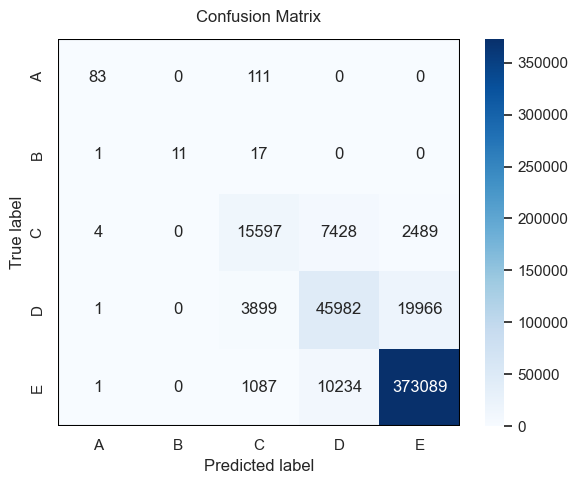

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ 예측/실제 값 문자열 라벨로 복원
y_val_str = le_y.inverse_transform(y_val)
y_pred_str = le_y.inverse_transform(y_pred)

# ✅ 혼동 행렬 생성
cm = confusion_matrix(y_val_str, y_pred_str, labels=le_y.classes_)

# 시각화
plt.figure(figsize=(6, 5))
sns.set(style="white")

ax = sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le_y.classes_,
    yticklabels=le_y.classes_,
    cbar=True,
    linewidths=0,
    linecolor='white'
)

# ✅ 바깥 테두리 추가
ax.add_patch(plt.Rectangle(
    (0, 0),
    cm.shape[1],
    cm.shape[0],
    fill=False,
    edgecolor='black',
    lw=1.5
))

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix", pad=12)
plt.tight_layout()
plt.show()

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 결측치 처리기
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # 학습 데이터로 fit 해야 함

# 스케일러
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [28]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. 데이터 불러오기
file_path = 'data/통합_test_데이터.parquet'
test_df = pd.read_parquet(file_path)

# 2. 피처 선택 (학습 데이터와 동일한 컬럼 사용)
X_test = test_df[all_features].copy()

# 3. 범주형 인코딩 (학습 때와 동일하게)
# map_categorical_columns 함수가 정의되어 있다면 사용
# map_categorical_columns 함수가 정의되어 있지 않다면 수동 인코딩 코드를 사용
# 현재 노트북 상태에 map_categorical_columns 함수가 정의되어 있으므로 함수 사용
X_test = map_categorical_columns(X_test, verbose=False) # 상세 출력 비활성화

# 4. 결측치 처리 (학습 데이터로 fit된 imputer 사용)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# 5. 스케일링 (학습 데이터로 fit된 scaler 사용)
X_test_scaled = scaler.transform(X_test)

# 6. 확률 예측
y_test_proba = xgb_model.predict_proba(X_test_scaled)

# 7. threshold 기반 예측 함수 정의
def predict_with_thresholds(y_proba, thresholds):
    preds = []
    for row in y_proba:
        candidates = [i for i, p in enumerate(row) if p >= thresholds[i]]
        if candidates:
            preds.append(candidates[np.argmax([row[i] for i in candidates])])
        else:
            preds.append(np.argmax(row))  # fallback
    return np.array(preds)

# 8. 이미 찾은 best_thresholds 적용 (이 값은 앞에서 구해둔 것!)
best_thresholds = [0.22, 0.27, 0.50, 0.50, 0.55]
y_test_pred_encoded = predict_with_thresholds(y_test_proba, best_thresholds)

# 9. 숫자 라벨 → 문자 라벨로 복원
y_test_pred = le_y.inverse_transform(y_test_pred_encoded)

# 10. 제출 파일 구성
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'Segment': y_test_pred
})

# 11. 중복 ID 제거 (가장 먼저 예측된 값 유지)
submission = submission.drop_duplicates(subset='ID', keep='first')

# 12. 제출 파일 저장
submission.to_csv("submission_threshold_tuned.csv", index=False)
print("✅ 최적 threshold 반영하여 저장 완료: submission_threshold_tuned.csv")


C:\Users\KING\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


✅ 최적 threshold 반영하여 저장 완료: submission_threshold_tuned.csv


In [29]:
import pandas as pd

# 예측 결과를 Series로 변환
y_series = pd.Series(y_test_pred, name="Segment")

# 분포 확인 (클래스별 건수 + 비율)
print("📊 예측된 Segment 분포:")
print(y_series.value_counts().sort_index())      # 클래스별 개수
print("\n📈 비율 (%):")
print((y_series.value_counts(normalize=True).sort_index() * 100).round(2))

📊 예측된 Segment 분포:
Segment
A        81
B         1
C     25755
D     79251
E    494912
Name: count, dtype: int64

📈 비율 (%):
Segment
A     0.01
B     0.00
C     4.29
D    13.21
E    82.49
Name: proportion, dtype: float64


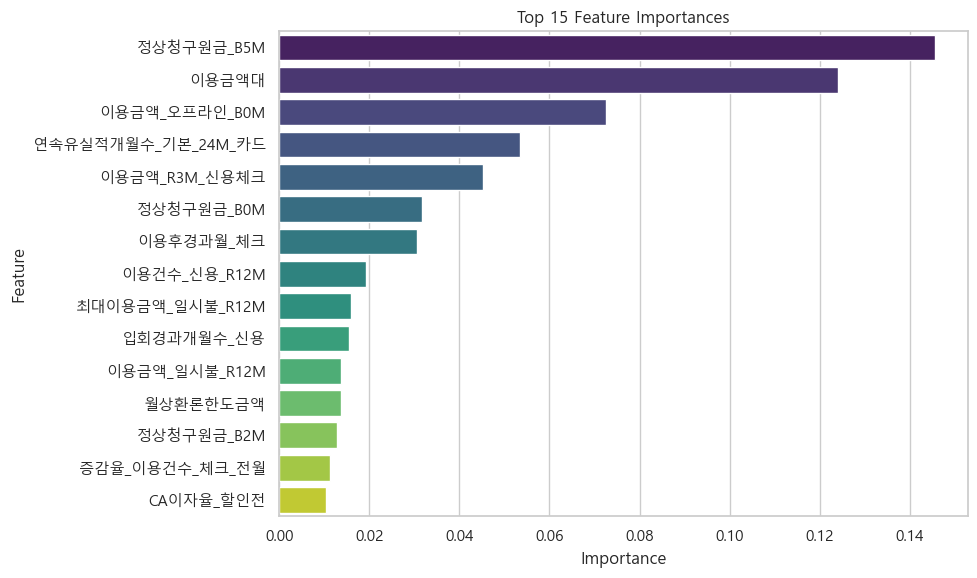

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# Feature 이름 가져오기
feature_names = all_features  # 또는 X_train.columns.tolist() 등

# Feature importance 값 얻기
importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()